# 01: Open, read and plot reanalysis data

In this exercise we are going to get familiar with reanalysis data and with the analysis tools we are going to use during the entire semester.

I have prepared a lot of code snipsets that you'll simply have to execute (remember how? simply type `[Shift+Enter]` when on a cell). 

This code will provide a *template* for your own code. I don't expect you to understand all of it, but I do hope that you are going to catch the major lines. You will have to copy and adapt parts of the code below to complete the exercises.

## Get the data

The ERA-Interim reanalysis data are available for free: http://apps.ecmwf.int/datasets/data/interim-full-daily 

I prepared a set of data files for these exercises, they are available in the following folder:

    $ ls /scratch/c707/c7071047/data

To avoid that everyone is reading the same file at the same time, make a copy of the data in your `climate_exercises` folder:

    $ cp /scratch/c707/c7071047/data/ERA-Int-Monthly-2mTemp.nc ~/climate_exercises/   

## Imports and options

The cell below imports the modules we will need for the exercises. You can use it as header of your own notebooks.

**Note:** this can take a few seconds. On a normal system this is fast, but here the modules are imported from a network directory.

In [1]:
# Define the tools we are going to need today
%matplotlib inline
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xray  # NetCDF library
import cartopy  # Plotting libary
import cartopy.crs as ccrs  # Projections
# Some defaults
plt.rcParams['figure.figsize'] = (14, 5)  # Default plot size
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen
# The commands below are not important
import warnings
warnings.filterwarnings('ignore')

## NetCDF files

Most of today's meteorological data are stored in the NetCDF format (`*.nc`). NetCDF files are *binary* files, which means that you can't just open them in a text editor. You need a special reader for it. Nearly all the programming languages offer an interface to NetCDF: for this course we are going to use the [xray](http://xray.readthedocs.org/en/stable/) library to read the data:

In [2]:
netcdf = xray.open_dataset('/home/mowglie/ERA-Int-Monthly-2mTemp.nc')

In [3]:
# See what we have
netcdf

<xray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 432)
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    t2m        (time, latitude, longitude) float64 242.7 242.7 242.7 242.7 ...
Attributes:
    Conventions: CF-1.0
    Info: Monthly ERA-Interim data. Downloaded and edited by fabien.maussion@uibk.ac.at

The NetCDF dataset is constituted of various elements: Dimensions, Coordinates, Variables, Attributes:
- the dimensions specify the number of elements of each data coordinates, their name is chosen to be understandable and representative
- the attributes usually do not contain any data: they provide some information about the file
- the variables contain the actual data. In our file there is only one variable ("t2m"). The t2m variable has the dimensions [time, latitude, longitude], so we can expect an array of size [432, 241, 480]

### Coordinates 

Let's have a look at the **time coordinate** first:

In [4]:
print(netcdf.time)

<xray.DataArray 'time' (time: 432)>
array(['1979-01-01T01:00:00.000000000+0100',
       '1979-02-01T01:00:00.000000000+0100',
       '1979-03-01T01:00:00.000000000+0100', ...,
       '2014-10-01T02:00:00.000000000+0200',
       '2014-11-01T01:00:00.000000000+0100',
       '2014-12-01T01:00:00.000000000+0100'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Attributes:
    long_name: time


Time goes from 1979-01-01 to 2014-12-01 in 432 steps. The **temporal resolution** of the data is **monthly**, therefore we have **36 years** of data.

The **location coordinates** are also self explaining:

In [5]:
print(netcdf.longitude)

<xray.DataArray 'longitude' (longitude: 480)>
array([   0.  ,    0.75,    1.5 , ...,  357.75,  358.5 ,  359.25], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
Attributes:
    units: degrees_east
    long_name: longitude


In [6]:
print(netcdf.latitude)

<xray.DataArray 'latitude' (latitude: 241)>
array([ 90.  ,  89.25,  88.5 , ..., -88.5 , -89.25, -90.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 84.75 ...
Attributes:
    units: degrees_north
    long_name: latitude


**Q: what is the spatial resolution of ERA-Interim data?**

### Variables 

Variables can also be accessed directly from the dataset:

In [7]:
print(netcdf.t2m)

<xray.DataArray 't2m' (time: 432, latitude: 241, longitude: 480)>
[49973760 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Attributes:
    units: K
    long_name: 2 metre temperature


The **attributes** of a variable are very important, they must be specified by the data provider. Here we can read in which units the variable is defined, as well as a description of the variable (the "long_name" attribute).

## A first plot

Plotting climate data is extremely easy in Python thanks to the [xray](http://xray.readthedocs.org/en/stable/) and [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) libraries. First we are going to compute the time average of the 2 m temperature over the entire period:

In [8]:
t2_avg = netcdf.t2m.mean(dim='time')

What did we just do? From the netcdf dataset, we took the t2m variable (`netcdf.t2m`) and we applied the function `.mean()` to it. So an equivalent formulation could be:

In [9]:
# Equivalent code:
t2_var = netcdf.t2m
t2_avg = t2_var.mean(dim='time')

What is `t2_avg` by the way?

In [10]:
t2_avg

<xray.DataArray 't2m' (latitude: 241, longitude: 480)>
array([[ 257.84742927,  257.84742927,  257.84742927, ...,  257.84742927,
         257.84742927,  257.84742927],
       [ 257.84873041,  257.85052202,  257.85238659, ...,  257.84434462,
         257.84589708,  257.84726713],
       [ 257.96570388,  257.96888176,  257.97208396, ...,  257.95092107,
         257.95588246,  257.96081546],
       ..., 
       [ 228.64890091,  228.63534223,  228.62179977, ...,  228.69163607,
         228.67742885,  228.66307165],
       [ 228.35621998,  228.34951968,  228.34279101, ...,  228.36645891,
         228.36303377,  228.35967754],
       [ 227.47810828,  227.47810828,  227.47810828, ...,  227.47810828,
         227.47810828,  227.47810828]])
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...

So `t2_avg` is a 2-dimensional array of dimensions [latitude, longitude] (note that the time dimension has disapeared).

When we applied the `mean()` function, we added an argument (called a **keyword argument**): `dim='time'`. With this argument, we told the function to compute the average *over the time dimension*.

Let's remove this keyword and compute the mean again:

In [11]:
t2_var.mean()

<xray.DataArray 't2m' ()>
array(278.41241332351854)

Ha! We now have an array without dimensions: a single element array, also called a **scalar**. This is the total average over all the dimensions: the average temperature of the Earth for the last 34 years...

.. but wait? 278.41 K converts to approx 5.26°C. We learned in the lecture that the average surface temperature of the Earth is about 15°C. A difference of 10°C is huge!

**Q: what could be the reason(s) for this difference?**

*(answer here)*

**Q: what should we expect from the flowing commands:**

    t2_var.mean(dim='longitude')
    t2_var.mean(dim='time').mean(dim='longitude')
    
**Try them out!**

In [12]:
# Try the commands above. Do they work as expected? 

**E: what is the average minimum temperature (in °C) on the globe? And the maximum?** ([hint](http://xray.readthedocs.org/en/stable/generated/xray.Dataset.max.html#xray.Dataset.max))

In [13]:
# Compute the min and max of t2_avg and convert them to degree celcius. Print the results.

### Plotting the 34-yr average of temperature 

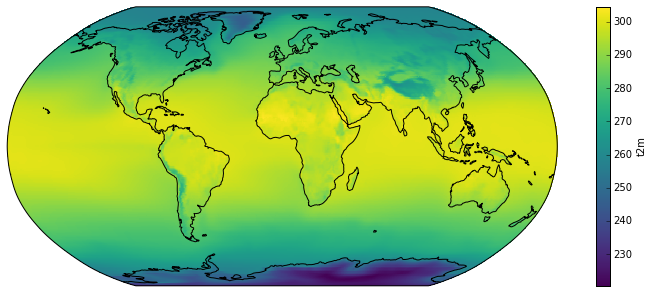

In [14]:
# Define the map projection.
ax = plt.axes(projection=ccrs.Robinson())
# ax is an empty plot. We now plot the variable t2_avg onto ax
t2_avg.plot(ax=ax, origin='upper', aspect='equal', transform=ccrs.PlateCarree()) 
# The keywords "origin" and "transform" are projection details 
# The keyword aspect just ensures that the plot aspect ratio is preserved
ax.coastlines();  # Add coastlines to the plot

** E: convert the average temperature to degrees celcius and plot it **

In [15]:
# Write your code here
# Tip: define a variable t2_avg_c wich is t2_avg in celsius and plot exactly like we did before.

**Q: the plot looks quite different in Celsius. What happened? Do you like the new plot better?**

## Change some plot parameters

### Title and units

Taken without context, our plots are not very good: what's the unit? what does "t2m" mean?

We should add meaningfull information to our plot:

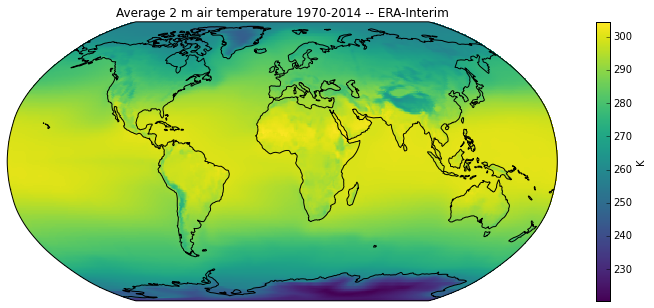

In [16]:
t2_avg.name = 'K' # this is a trick to get the units right. It is not very elegant but is the fastest way for us now.
ax = plt.axes(projection=ccrs.Robinson())
t2_avg.plot(ax=ax, origin='upper', aspect='equal', transform=ccrs.PlateCarree()) 
# Add a title
ax.set_title('Average 2 m air temperature 1970-2014 -- ERA-Interim')
ax.coastlines();

### The colormap

The best colormap for any given data set depends on many things. There are several colormaps available in matplotlib: 

http://matplotlib.org/1.4.3/users/colormaps.html

Let's try the "summer" colormap:

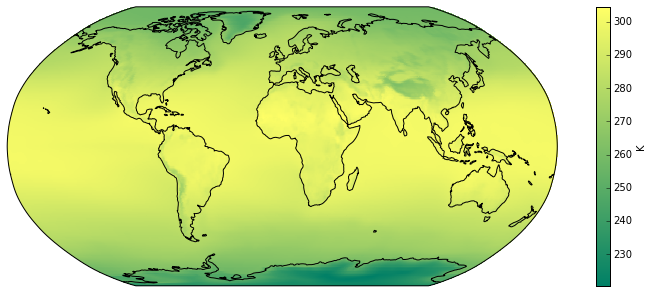

In [17]:
ax = plt.axes(projection=ccrs.Robinson())
t2_avg.plot(ax=ax, origin='upper', aspect='equal', transform=ccrs.PlateCarree(), cmap=plt.get_cmap('summer')) 
ax.coastlines();

### The data and color levels

The default plotting practices for images is to use **continuous** colormaps. Continuous colormaps are good in showing details and patterns but they have a default: it is difficult to assign a color to an exact value because our eyes are not able to see small differences between colors.

First, we are going to try out **discrete** levels:

In [ ]:
ax = plt.axes(projection=ccrs.Robinson())
# Choose ten levels
t2_avg.plot(ax=ax, origin='upper', aspect='equal', transform=ccrs.PlateCarree(), levels=10) 
ax.coastlines();

**Q: what is the dominant temperature range in the tropics?**

By specifying `levels=10`, the plot intervals are regular and chosen to cover the whole temperature range. However this has a negative effect: the levels are biased towards the very cold temperatures, and it hides many details in the tropics where temperature variations are lower than 10 K. 

We can choose the levels in order to add more detail in the tropics and reduce detail at the poles:

In [ ]:
ax = plt.axes(projection=ccrs.Robinson())
# Choose the levels manually
t2_avg.plot(ax=ax, origin='upper', aspect='equal', transform=ccrs.PlateCarree(), 
            levels=[240, 260, 280, 285, 290, 294, 298, 302]) 
ax.coastlines();

**Q: Where are the warmest temperature on Earth? The coldest? Note the places on Earth where the meridional gradients are strongest. What are the common features of the eastern boundaries of the major oceans?**

** E: make a "different" plot of the temperature in Celsius you did before. Add a title and the unit to the colorbar. By comparing the minimum and maximum value of t2_avg_c, determine why the automatic colorbar levels were chosen this way by the plot function. Choose a detailed set of discrete data levels and plot it.**

In [ ]:
# "Better" plot of the temperature in Celsius

## What next?

We have learned how to compute some standard statistics from a NetCDF dataset. Now we will apply what we learned in the following notebook:

    $ cp /scratch/c707/c7071047/teaching/Exercises/02_Exercises_ERA-Interim_Temperature.ipynb ~/climate_exercises/